In [9]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, precision_score, f1_score, log_loss, confusion_matrix, roc_curve, roc_auc_score,recall_score
from tensorflow.keras.callbacks import EarlyStopping

In [10]:
data = pd.read_csv(r"C:\Users\beher\OneDrive\Desktop\NEW_METHOD\data_wo_cluster.csv")
data = data.sample(frac=1).reset_index(drop=True)
X = data.drop(columns=['CLASS'])
y = data['CLASS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [11]:
categorical_cols = [col for col in X_train.columns if X_train[col].dtype == 'object']
numerical_cols = [col for col in X_train.columns if col not in categorical_cols]

# Preprocessing for numerical features
scaler = StandardScaler()
X_train_numeric = scaler.fit_transform(X_train[numerical_cols])
X_test_numeric = scaler.transform(X_test[numerical_cols])

# Preprocessing for categorical features
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
X_train_categorical = categorical_transformer.fit_transform(X_train[categorical_cols])
X_test_categorical = categorical_transformer.transform(X_test[categorical_cols])

# Concatenate processed features
X_train_processed = np.concatenate((X_train_numeric, X_train_categorical.toarray()), axis=1)
X_test_processed = np.concatenate((X_test_numeric, X_test_categorical.toarray()), axis=1)


In [12]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_processed.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, mode='max', verbose=1)

# Train the model
history = model.fit(X_train_processed, y_train, epochs=100, batch_size=32, 
                    validation_data=(X_test_processed, y_test), callbacks=[early_stopping])

Epoch 1/100


C:\Users\beher\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5823 - loss: 0.6692 - val_accuracy: 0.7033 - val_loss: 0.5893
Epoch 2/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7036 - loss: 0.5833 - val_accuracy: 0.7346 - val_loss: 0.5553
Epoch 3/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7465 - loss: 0.5477 - val_accuracy: 0.7286 - val_loss: 0.5436
Epoch 4/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7306 - loss: 0.5505 - val_accuracy: 0.7437 - val_loss: 0.5346
Epoch 5/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7691 - loss: 0.5018 - val_accuracy: 0.7397 - val_loss: 0.5341
Epoch 6/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7669 - loss: 0.4930 - val_accuracy: 0.7487 - val_loss: 0.5271
Epoch 7/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7795 - loss: 0.4786 - val_accuracy: 0.7437 - val_loss: 0.5238
Epoch 8/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7786 - loss: 0.4686 - val_accuracy: 0.7528 - val_loss: 0.5

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7656 - loss: 0.5353 
Test accuracy: 0.7578203678131104


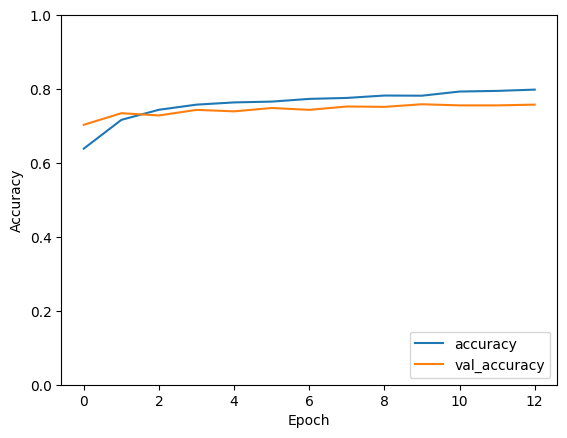

In [13]:
model.save_weights('MLPNN_trained.weights.h5')

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test_processed, y_test)
print('Test accuracy:', test_acc)

# Plot training history
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [14]:
y_pred_proba = model.predict(X_test_processed)
y_pred = (y_pred_proba > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
logloss = log_loss(y_test, y_pred_proba)
conf_matrix = confusion_matrix(y_test, y_pred)

TP = conf_matrix[1, 1]
FP = conf_matrix[0, 1]
TN = conf_matrix[0, 0]
FN = conf_matrix[1, 0]

TPR = TP / (TP + FN)
FPR = FP / (FP + TN)
FNR = FN / (FN + TP)
TNR = TN / (TN + FP)

print("True Positive Rate (TPR):", TPR)
print("False Positive Rate (FPR):", FPR)
print("False Negative Rate (FNR):", FNR)
print("True Negative Rate (TNR):", TNR)
print("Accuracy:", accuracy)
print("Recall", recall)
print("ROC AUC:", roc_auc)
print("Precision:", precision)
print("F1 Score:", f1)
print("Log Loss:", logloss)
print("Confusion Matrix:", conf_matrix)

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
True Positive Rate (TPR): 0.7586206896551724
False Positive Rate (FPR): 0.2429718875502008
False Negative Rate (FNR): 0.2413793103448276
True Negative Rate (TNR): 0.7570281124497992
Accuracy: 0.7578203834510595
Recall 0.7586206896551724
ROC AUC: 0.8201691145922433
Precision: 0.7555555555555555
F1 Score: 0.757085020242915
Log Loss: 0.5240375126093108
Confusion Matrix: [[377 121]
 [119 374]]


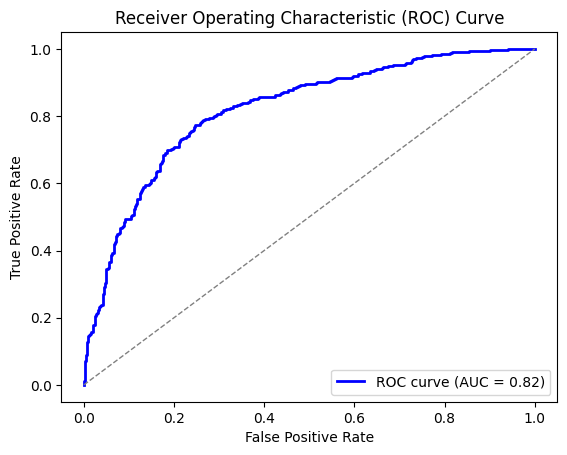

In [15]:
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, f1_score, log_loss, confusion_matrix, roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Confusion Matrix:
[[377 121]
 [119 374]]


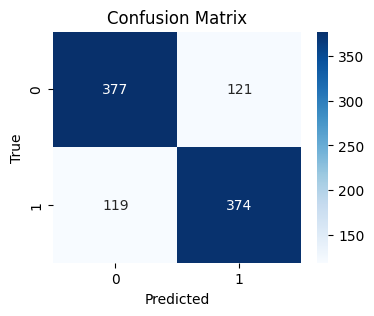

In [18]:
import seaborn as sns
print("Confusion Matrix:")
print(conf_matrix)

plt.figure(figsize=(4, 3))  # Adjust the figsize as needed
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [48]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Load the new CSV dataset
new_data = pd.read_csv(r"C:\Users\beher\OneDrive\Desktop\NEW_METHOD\NEW_TESTING.csv")

# Separate features
X_new = new_data  

# Preprocessing for numerical features
X_new_numeric = scaler.transform(X_new[numerical_cols])

# Preprocessing for categorical features
X_new_categorical = categorical_transformer.transform(X_new[categorical_cols])

# Concatenate processed features
X_new_processed = np.concatenate((X_new_numeric, X_new_categorical.toarray()), axis=1)

# Predict probabilities for the new dataset
y_new_pred_proba = model.predict(X_new_processed)

# Probabilities for class 1 (assuming it's a binary classification problem)
class_1_probabilities = y_new_pred_proba.flatten()

# Probabilities for class 0
class_0_probabilities = 1 - class_1_probabilities

# Add the predicted probabilities as new columns to the new dataset
new_data['Predicted_Probability_Class_0'] = class_0_probabilities
new_data['Predicted_Probability_Class_1'] = class_1_probabilities



24384/24384 ━━━━━━━━━━━━━━━━━━━━ 35s 1ms/step


In [49]:
new_data.to_csv(r"C:\Users\beher\again\mlpnn_cat_lulc3_predicted_probs.csv", index=False)

In [19]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Load the new CSV dataset
new_data = pd.read_csv(r"C:\Users\beher\OneDrive\Desktop\NEW_METHOD\ls_merge_data.csv")

# Separate features
X_new = new_data  # Assuming no target variable



# Preprocessing for numerical features
X_new_numeric = scaler.transform(X_new[numerical_cols])

# Preprocessing for categorical features
X_new_categorical = categorical_transformer.transform(X_new[categorical_cols])

# Concatenate processed features
X_new_processed = np.concatenate((X_new_numeric, X_new_categorical.toarray()), axis=1)

# Predict probabilities for the new dataset
y_new_pred_proba = model.predict(X_new_processed)

# Probabilities for class 1 (assuming it's a binary classification problem)
class_1_probabilities = y_new_pred_proba.flatten()

# Probabilities for class 0
class_0_probabilities = 1 - class_1_probabilities

# Add the predicted probabilities as new columns to the new dataset
new_data['Predicted_Probability_Class_0'] = class_0_probabilities
new_data['Predicted_Probability_Class_1'] = class_1_probabilities

new_data.to_csv(r"C:\Users\beher\again\mlpnn_NEWSHING_cat_lulc3_predicted_probs.csv", index=False)

104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
